1000 Samples, 616 Rejected


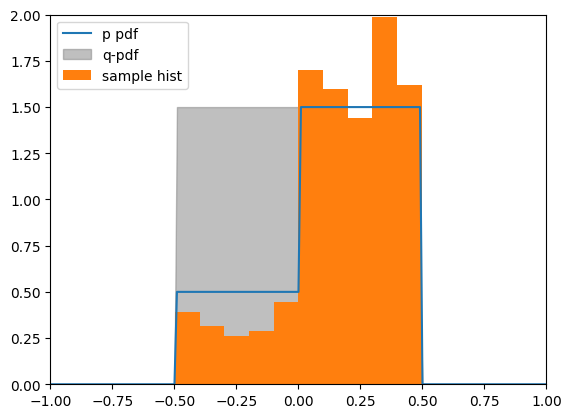

In [14]:
import random
import math
import matplotlib.pyplot as plt

def q_pdf(x):
    if (x > -0.5 and x <= 0.0):
        return 1.5
    if (x > 0.0 and x < 0.5):
        return 0.5
    return 0

def p_pdf(x):
    if (x > -0.5 and x <= 0.0):
        return 0.5
    if (x > 0.0 and x < 0.5):
        return 1.5
    return 0

def reject_sampling(n: int, xlimit=[-0.5,0.5]):
    N_rejected = 0
    # sample data from q_pdf
    q_samples = []
    max_pdf = 1.0
    while (len(q_samples) < n):
        # randomly choose x candidate
        x_candidate = random.random() * (xlimit[1]-xlimit[0]) + xlimit[0]
        accept_prob = q_pdf(x_candidate) / max_pdf 
        if random.random() < accept_prob:
            q_samples.append(x_candidate)

    # reject from p_pdf
    p_samples = []
    for i in range(n):
        x = q_samples[i]
        u = random.uniform(0, 1)
        if u < p_pdf(x) / (3.0 * q_pdf(x)):
            p_samples.append(x)
        else:
            N_rejected = N_rejected + 1
    
    print(f"{n} Samples, {N_rejected} Rejected")
    return p_samples

if __name__ == "__main__":
    # draw normal distribution
    xlimit = [-1, 1]
    ylimit = [0, 2]
    x = [i/100 for i in range(-100, 101)]
    py = [p_pdf(i) for i in x]
    plt.plot(x, py, label='p pdf')
    qy = [q_pdf(i) for i in x]
    # q pdf with fill in the background
    plt.fill_between(x, qy, 0, color='gray', alpha=0.5, label="q-pdf")
    N_samples = 1000
    samples = reject_sampling(N_samples)
    N_bins = 10
    # draw with hist distribution
    plt.hist(samples, bins=N_bins, density=True, label='sample hist')
    # plot uniform pdf as 
    plt.legend()
    plt.xlim(xlimit)
    plt.ylim(ylimit)
    plt.show()